<a href="https://colab.research.google.com/github/amirhnazerii/Autoencoder_DimentionalityReduction/blob/main/Autoencoder_DimentionalityReduction_v_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autoencoder Image Dimentionality Reduction

__author__ = "Amir Nazeri" 

__copyright__ = "Copyright Spring 2022, The Advanced Neural Network Project @CU-ICAR"

__license__ = "GPL"

__version__ = "Final"

__email__ = "anazeri@clemson.edu"

In this project, two models are built for dimensionality reduction based on PCA and Autoencoder, respectively. I used the developed models on the handwritten digits and compare the performance. The Autoencoder and PCA performances are compared with each other.


## Autoencoders vs. Principal Components Analysis
Principal components analysis (PCA) is a common used method for dimensionality reduction. It's an unsupervised technique that reduces the dimensionality of the data by **orthogonally transforming** the data into a set of principal components. The first principal component explains the most amount of the variation in the data in a single component, the second component explains the second most amount of the variation, etc. By choosing the top principal components that explain say 80-90% of the variation, the other components can be dropped since they do not significantly benefit the model.

Autoencoder is another unsupervised technique can be used for dimensionality reduction in which we leverage neural networks for the task of representation learning. Specifically, a **bottleneck** will be imposed in the network which forces a compressed knowledge representation of the original input.

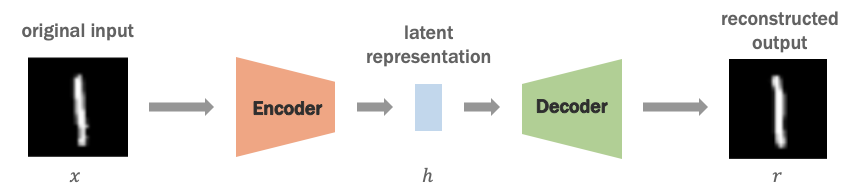


## Dataset and Preprocessing 

[MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) dataset is used in this project.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_47 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_48 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_49 (Dense)             (None, 32)                8032      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 66        
_________________________________________________________________
dense_50 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_51 (Dense)             (None, 250)              

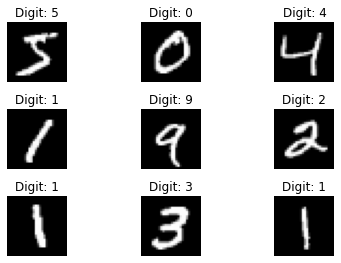

---------------------------------------------------------------------------------------------------------------------
Reconstructed images


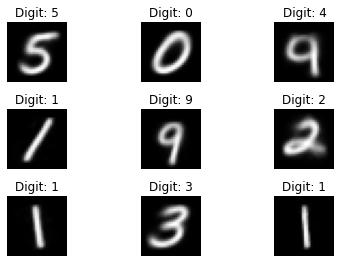

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46_input (InputLayer)  [(None, 784)]             0         
_________________________________________________________________
dense_46 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_47 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_48 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_49 (Dense)             (None, 32)                8032      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 66        
Total params: 1,418,848
Trainable params: 1,418,848
Non-trainable params: 0
_________________________________________________

In [ ]:
# Importing Packages
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# Normalize
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Building the model
model = Sequential([
    Dense(1000, activation='relu', input_shape=(784,)),
    Dense(500, activation='relu'),
    Dense(250, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, name='bottleneck'),
    Dense(32, activation='relu'),
    Dense(250, activation='relu'),
    Dense(500, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(784, activation='sigmoid'),
])

model.summary()

# using mse for loss and adam for optimizer
model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(x_train, x_train, batch_size=128, epochs=25, verbose=1, validation_data=(x_test, x_test))

# Reconstruct images
reconstructed_images = model.predict(x_train)

# Plot examples of original images
fig = plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title("Digit: {}".format(y_train[i]))
  plt.axis('off')
plt.show()

# Plot examples of constructed images
print('---------------------------------------------------------------------------------------------------------------------')
print('Reconstructed images')
fig = plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
  plt.title("Digit: {}".format(y_train[i]))
  plt.axis('off')
plt.show()

# Taking the latent representation
encoder = Model(model.input, model.get_layer('bottleneck').output)
encoded = encoder.predict(x_train)
encoder.summary()


PCA reconstruction loss: 0.05595528403340281


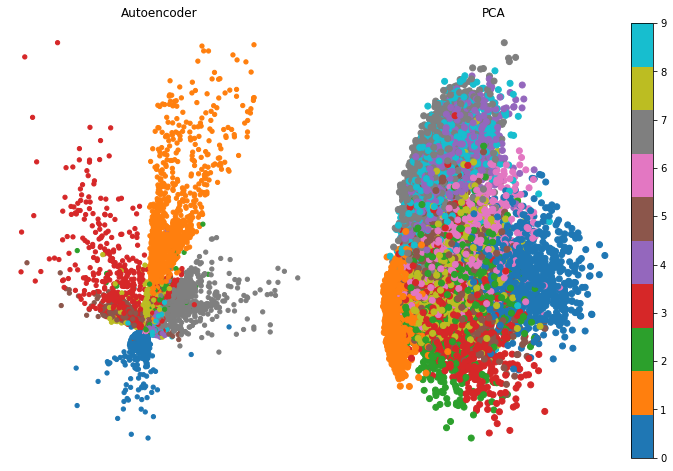

In [ ]:
# Dimensionality reduction with PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_pca_inv = pca.inverse_transform(x_train_pca[:,:2])
loss = ((x_train - x_pca_inv) ** 2).mean()
print("PCA reconstruction loss:", loss)

# Comparison of Autoencoder and PCA
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.scatter(encoded[:9000, 0], encoded[:9000, 1], s=18, c=y_train[:9000], cmap='tab10')
plt.title('Autoencoder')
plt.axis('off')

plt.subplot(122)
plt.scatter(x_train_pca[:,:2][:9000, 0], x_train_pca[:,:2][:9000, 1], c=y_train[:9000], cmap='tab10')
plt.title('PCA')
plt.axis('off')
plt.colorbar()
plt.show()